### Load Dataset 

In [1]:
import numpy as np
import pandas as pd
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.ops import split, snap
import matplotlib.pyplot as plt 
import seaborn as sns 
import geopandas as gpd
# from mpl_toolkits.basemap import Basemap
import warnings
import os
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Create function to interpolate line to nearest points

def interpolate_line_nearest_points(gdf_line, gdf_points):
    
    """
    ----------
    gdf_line : geoDataFrame
        geodataframe with multiple rows of connecting line segments
    gdf_points : geoDataFrame
        geodataframe with multiple rows of single points

    Returns
    -------
    result : geoDataFrame
        geodataframe of points
    """

    # union all geometries
    print("Step: Union all lines")
    line = gdf_line.geometry.unary_union
    #coords = gdf_points.geometry.unary_union

    # Use linear referencing to find the nearest dam point on the river line
    print("Step: Copy point layer to store results")
    result = gdf_points.copy()
    print("Step: Use linear referencing to find the nearest dam point on the river line")
    result['geometry'] = result.apply(lambda row: line.interpolate(line.project(row.geometry)), axis=1)

    # Check interpolate distance
    print("Step: Add interpolate distance")
    result['intp_dist'] = gdf_points.distance(result)

    # Return results
    print("Step: Return results")
    return result

In [3]:
os.getcwd()
os.chdir(r'/scratch/gpfs/tianboz/GlobalDams/Data')
gdat = gpd.read_file("GDAT/GlobalDam_v0_abbVarName.shp")
gdat.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Africa

In [4]:
river_af = gpd.read_file("HydroRivers/HydroRIVERS_v10_af_shp/HydroRIVERS_v10_af_shp/HydroRIVERS_v10_af.shp")
river_af.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
boundary_af = gpd.read_file("Administrative/Natural_Earth/ne_10m_admin_0_countries/ne_10m_admin_0_africa.shp")
boundary_af.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
gdat_af = gpd.clip(gdat, boundary_af)

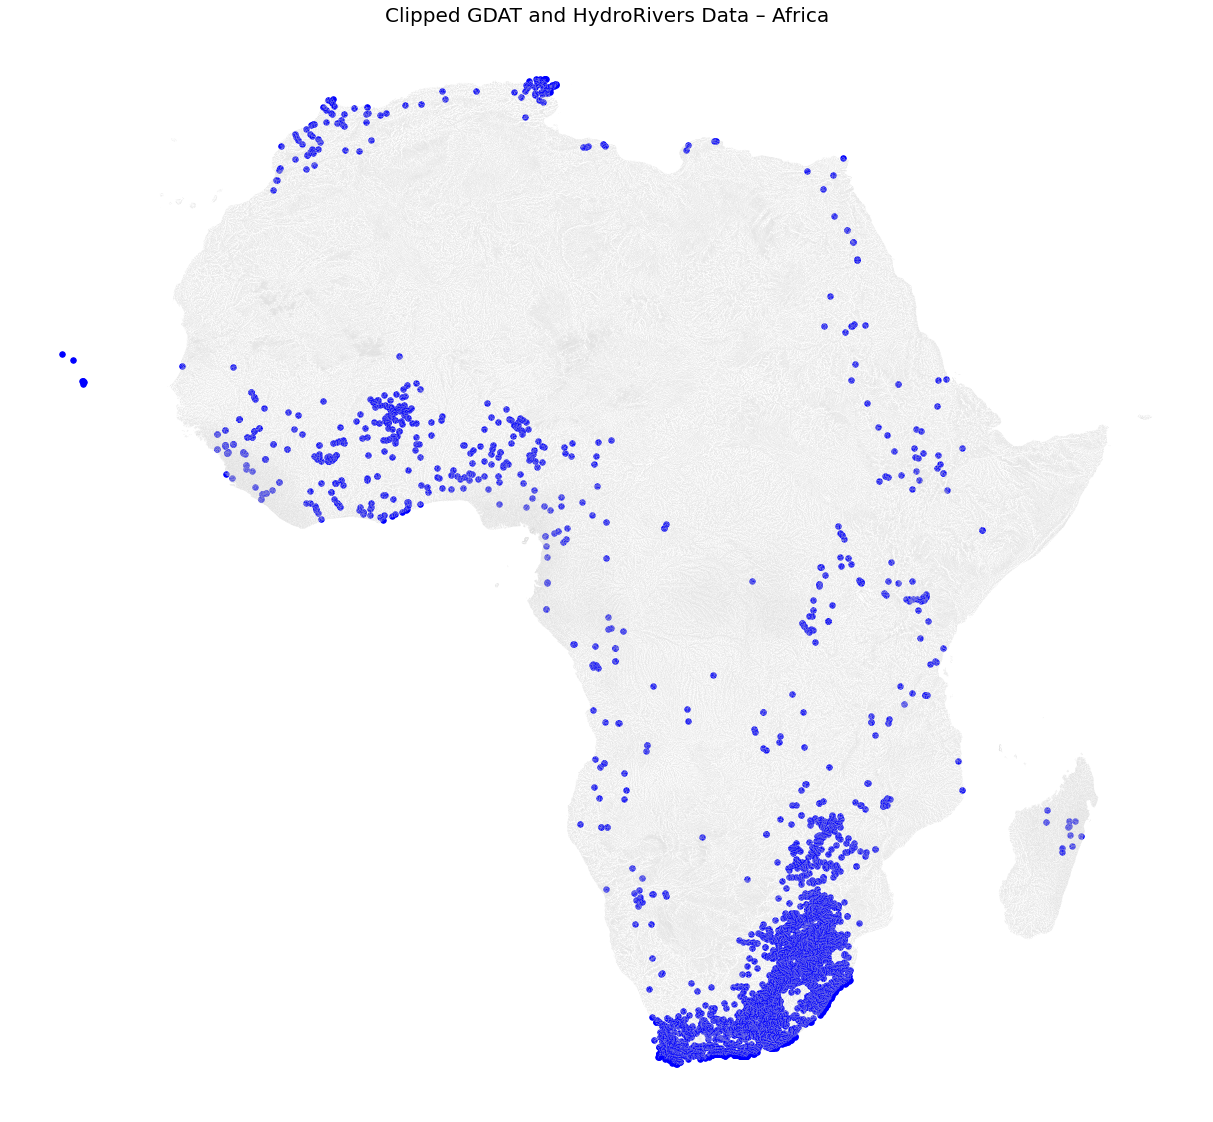

In [7]:
# Plotting clipped data 
fig, ax1 = plt.subplots(1, 1, figsize=(22, 20))
river_af.plot(ax=ax1, color="lightgray", linewidth = 0.2)
gdat_af.plot(ax=ax1, markersize=30, color= "blue")
ax1.set_title("Clipped GDAT and HydroRivers Data – Africa", fontsize=20)
ax1.set_axis_off()
plt.show()

In [8]:
# Use linear referencing to find the nearest dam point on the river line
result_af = interpolate_line_nearest_points(river_af, gdat_af)

Step: Union all lines
Step: Copy point layer to store results
Step: Use linear referencing to find the nearest dam point on the river line
Step: Add interpolate distance
Step: Return results


In [9]:
# Save corrected dam files
os.chdir(r'/scratch/gpfs/tianboz/GlobalDams/Data')
result_af.to_file("Interpolate_GDAT_HydroRivers/Intp_GDAT_HydroRivers_Africa.shp")

### North America + Arctic 

In [10]:
river_na = gpd.read_file("HydroRivers/HydroRIVERS_v10_na_shp/HydroRIVERS_v10_na_shp/HydroRIVERS_v10_na.shp")
river_na.crs
river_ar = gpd.read_file("HydroRivers/HydroRIVERS_v10_ar_shp/HydroRIVERS_v10_ar_shp/HydroRIVERS_v10_ar.shp")
river_ar.crs

river_na_ar = river_na.append(river_ar)

In [11]:
boundary_na = gpd.read_file("Administrative/Natural_Earth/ne_10m_admin_0_countries/ne_10m_admin_0_northAmerica.shp")
boundary_na.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
gdat_na = gpd.clip(gdat, boundary_na)

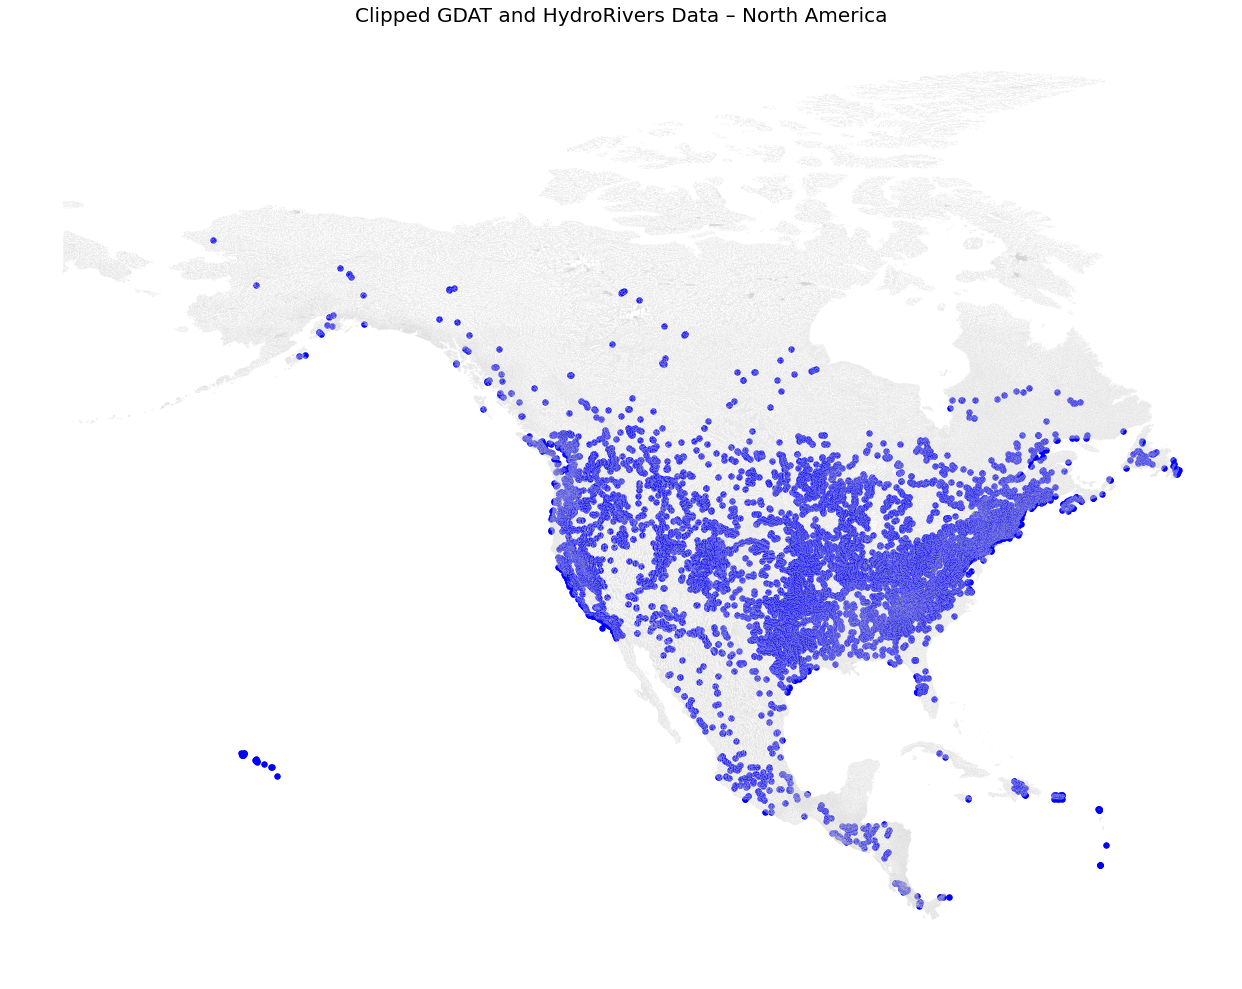

In [13]:
# Plotting clipped data 
fig, ax1 = plt.subplots(1, 1, figsize=(22, 20))
river_na_ar.plot(ax=ax1, color="lightgray", linewidth = 0.2)
gdat_na.plot(ax=ax1, markersize=30, color= "blue")
ax1.set_title("Clipped GDAT and HydroRivers Data – North America", fontsize=20)
ax1.set_axis_off()
plt.show()

In [14]:
# Use linear referencing to find the nearest dam point on the river line
result_na = interpolate_line_nearest_points(river_na_ar, gdat_na)

Step: Union all lines
Step: Copy point layer to store results
Step: Use linear referencing to find the nearest dam point on the river line
Step: Add interpolate distance
Step: Return results


In [15]:
# Save corrected dam files
os.chdir(r'/scratch/gpfs/tianboz/GlobalDams/Data')
result_na.to_file("Interpolate_GDAT_HydroRivers/Intp_GDAT_HydroRivers_NorthAmerica.shp")

### South America

In [16]:
os.getcwd()
os.chdir(r'/scratch/gpfs/tianboz/GlobalDams/Data')
river_sa = gpd.read_file("HydroRivers/HydroRIVERS_v10_sa_shp/HydroRIVERS_v10_sa_shp/HydroRIVERS_v10_sa.shp")
river_sa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
boundary_sa = gpd.read_file("Administrative/Natural_Earth/ne_10m_admin_0_countries/ne_10m_admin_0_southAmerica.shp")
boundary_sa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
gdat_sa = gpd.clip(gdat, boundary_sa)

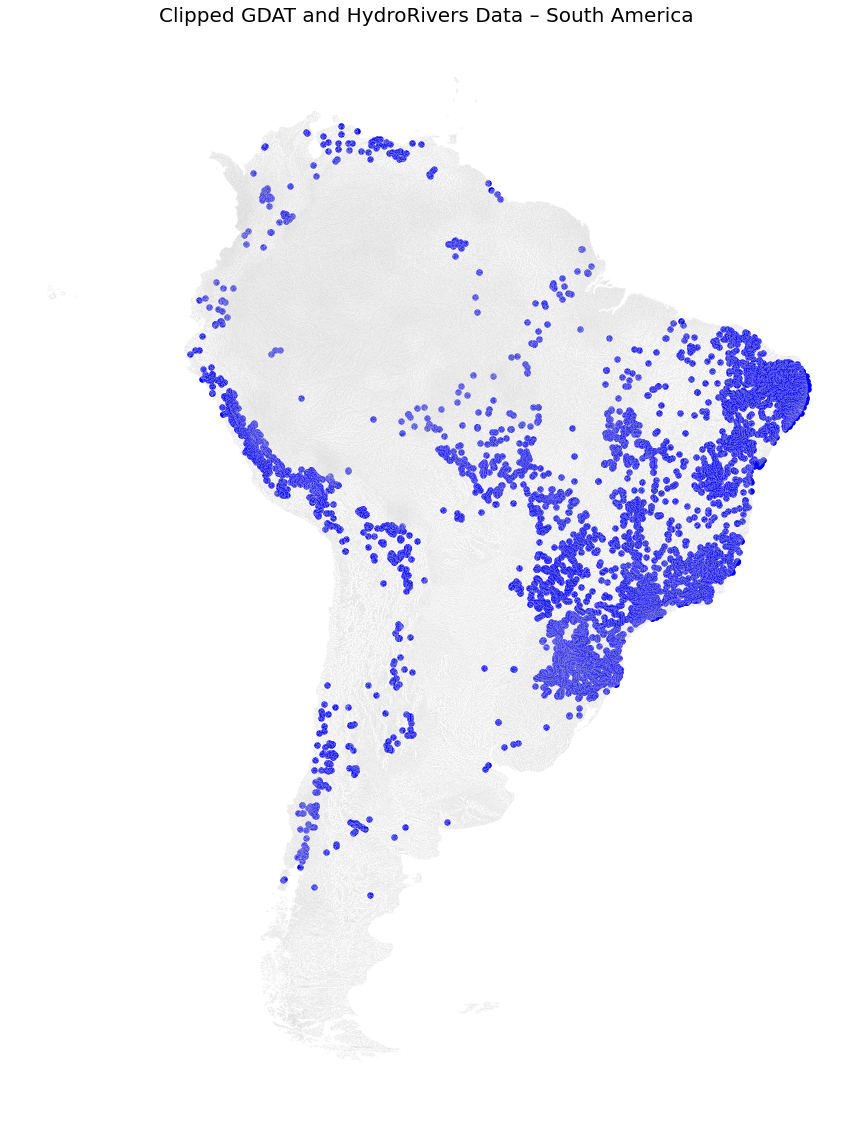

In [19]:
# Plotting clipped data 
fig, ax1 = plt.subplots(1, 1, figsize=(22, 20))
river_sa.plot(ax=ax1, color="lightgray", linewidth = 0.2)
gdat_sa.plot(ax=ax1, markersize=30, color= "blue")
ax1.set_title("Clipped GDAT and HydroRivers Data – South America", fontsize=20)
ax1.set_axis_off()
plt.show()

In [20]:
# Use linear referencing to find the nearest dam point on the river line
result_sa = interpolate_line_nearest_points(river_sa, gdat_sa)

Step: Union all lines
Step: Copy point layer to store results
Step: Use linear referencing to find the nearest dam point on the river line
Step: Add interpolate distance
Step: Return results


In [21]:
# Save corrected dam files
os.chdir(r'/scratch/gpfs/tianboz/GlobalDams/Data')
result_sa.to_file("Interpolate_GDAT_HydroRivers/Intp_GDAT_HydroRivers_SouthAmerica.shp")

### Asia + Oceania + Europe 

In [4]:
# Asia 
river_as = gpd.read_file("HydroRivers/HydroRIVERS_v10_as_shp/HydroRIVERS_v10_as_shp/HydroRIVERS_v10_as.shp")
river_as.crs

# Europe
river_eu = gpd.read_file("HydroRivers/HydroRIVERS_v10_eu_shp/HydroRIVERS_v10_eu_shp/HydroRIVERS_v10_eu.shp")
river_eu.crs

# Australia 
river_au = gpd.read_file("HydroRivers/HydroRIVERS_v10_au_shp/HydroRIVERS_v10_au_shp/HydroRIVERS_v10_au.shp")
river_au.crs

# Siberia 
river_si = gpd.read_file("HydroRivers/HydroRIVERS_v10_si_shp/HydroRIVERS_v10_si_shp/HydroRIVERS_v10_si.shp")
river_si.crs

river_as_eu_au_si = river_as.append(river_eu).append(river_au).append(river_si)

In [5]:
boundary_as = gpd.read_file("Administrative/Natural_Earth/ne_10m_admin_0_countries/ne_10m_admin_0_asia.shp")
boundary_eu = gpd.read_file("Administrative/Natural_Earth/ne_10m_admin_0_countries/ne_10m_admin_0_europe.shp")
boundary_au = gpd.read_file("Administrative/Natural_Earth/ne_10m_admin_0_countries/ne_10m_admin_0_oceania.shp")
boundary_as_eu_au = boundary_as.append(boundary_eu).append(boundary_au)
boundary_as_eu_au.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
gdat_as_eu_au = gpd.clip(gdat, boundary_as_eu_au)

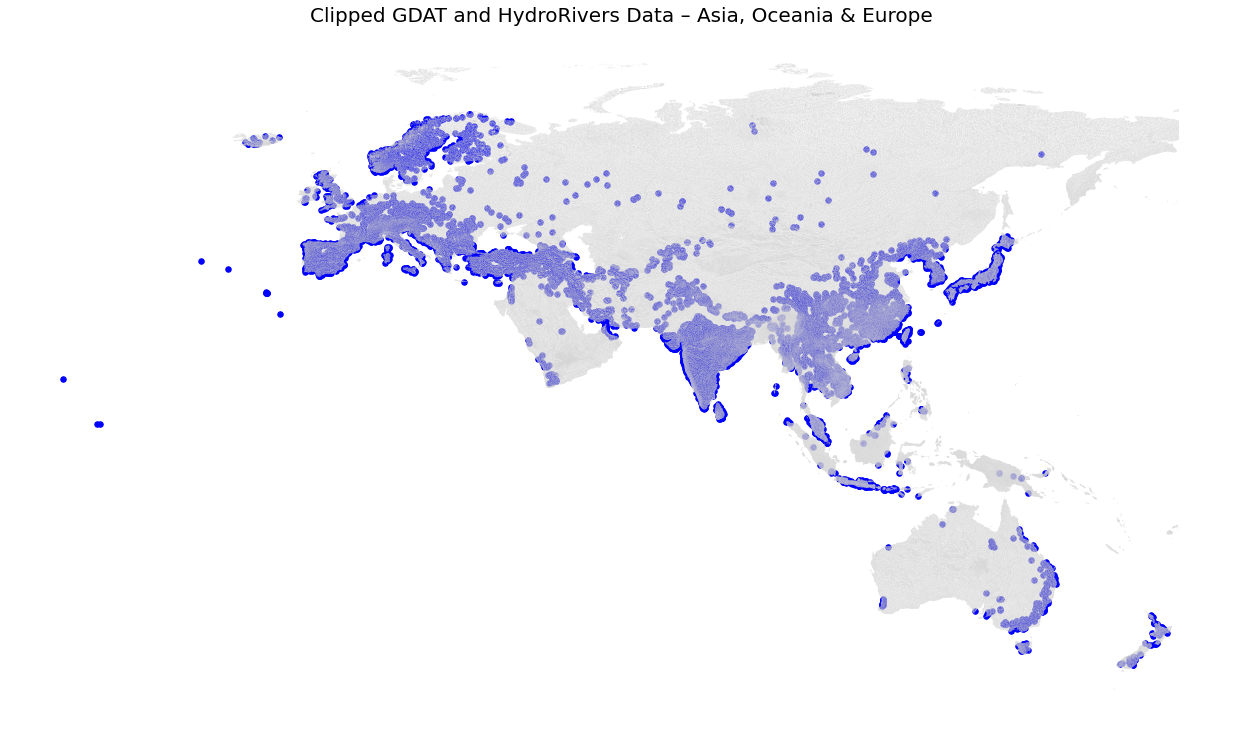

In [7]:
# Plotting clipped data 
fig, ax1 = plt.subplots(1, 1, figsize=(22, 20))
river_as_eu_au_si.plot(ax=ax1, color="lightgray", linewidth = 0.2)
gdat_as_eu_au.plot(ax=ax1, markersize=30, color= "blue")
ax1.set_title("Clipped GDAT and HydroRivers Data – Asia, Oceania & Europe", fontsize=20)
ax1.set_axis_off()
plt.show()

In [8]:
# Use linear referencing to find the nearest dam point on the river line
result_as_eu_au = interpolate_line_nearest_points(river_as_eu_au_si, gdat_as_eu_au)

Step: Union all lines
Step: Copy point layer to store results
Step: Use linear referencing to find the nearest dam point on the river line
Step: Add interpolate distance
Step: Return results


In [9]:
# Save corrected dam files
os.chdir(r'/scratch/gpfs/tianboz/GlobalDams/Data')
result_as_eu_au.to_file("Correct/Intp_GDAT_HydroRivers_AsiaOceaniaEurope.shp")

## Combined all interpolated shapefiles


In [10]:
os.chdir(r'/scratch/gpfs/tianboz/GlobalDams/Data')
result_af = gpd.read_file("Interpolate_GDAT_HydroRivers/Intp_GDAT_HydroRivers_Africa.shp")
result_na = gpd.read_file("Interpolate_GDAT_HydroRivers/Intp_GDAT_HydroRivers_NorthAmerica.shp")
result_sa = gpd.read_file("Interpolate_GDAT_HydroRivers/Intp_GDAT_HydroRivers_SouthAmerica.shp")
result_as_eu_au = gpd.read_file("Interpolate_GDAT_HydroRivers/Intp_GDAT_HydroRivers_AsiaOceaniaEurope.shp")

In [11]:
result_world = result_af.append(result_na).append(result_sa).append(result_as_eu_au)
result_world.to_file("Interpolate_GDAT_HydroRivers/Intp_GDAT_HydroRivers_World.shp")

## Test Code Below - Subset Nile River

### Load GDAT Data

In [ ]:
os.getcwd()
os.chdir(r'/scratch/gpfs/tianboz/GlobalDams/Data')
gdat = gpd.read_file("GDAT/GlobalDam_v0_abbVarName.shp")
gdat.crs
# gdat = pd.read_csv("GlobalDam_v0.csv")

### Load HydroRiver Data

In [ ]:
river_af = gpd.read_file("HydroRivers/HydroRIVERS_v10_af_shp/HydroRIVERS_v10_af_shp/HydroRIVERS_v10_af.shp")
river_af.crs

In [ ]:
# Create a custom polygon
polygon = Polygon([(27.2, 33.0), (32.6, 33.0), (46.5, 4.7), (27.2, 6.01), (27.2, 33.0)])
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=gdat.crs)

In [ ]:
# Overlay polygon and GDAT
fig, ax1 = plt.subplots(1, 1, figsize=(22, 20))
gdat.plot(ax=ax1, markersize=5)
poly_gdf.boundary.plot(ax=ax1, color="red")
ax1.set_title("All Unclipped GDAT Data", fontsize=20)
ax1.set_axis_off()
plt.show()

In [ ]:
# Clip GDAT data
gdat_clipped = gpd.clip(gdat, polygon)

In [ ]:
# Clip HydroRivers data
river_af_clipped = gpd.clip(river_af, polygon)

In [ ]:
# Plotting clipped data 
fig, ax1 = plt.subplots(1, 1, figsize=(22, 20))
gdat_clipped.plot(ax=ax1, markersize=30, color= "blue")
river_af_clipped.plot(ax=ax1, color="lightgray", linewidth = 0.5)
ax1.set_title("Clipped GDAT and HydroRivers Data", fontsize=20)
ax1.set_axis_off()
plt.show()

In [ ]:
# Save subset files
os.chdir(r'/scratch/gpfs/tianboz/GlobalDams/Data')
gdat_clipped.to_file("Subset_Africa/GDAT_NileRiver.shp")
river_af_clipped.to_file("Subset_Africa/HydroRivers_NileRiver.shp")

In [ ]:
len(gdat_clipped)

### Snap GDAT to Rivers

In [ ]:
gdat_clipped.head()

In [ ]:
river_af_clipped.head()

### Method 1: Snapping dam (point) to river (line) -- Interpolate

In [ ]:
result = interpolate_line_nearest_points(river_af_clipped, gdat_clipped)

In [ ]:
result.sort_values(by=['intp_dist'])

In [ ]:
# Union geometries of rivers 
shply_line = river_af_clipped.geometry.unary_union

# Union geometries of dams
shply_point = gdat_clipped.geometry.unary_union

# Use linear referencing to find the nearest dam point on the river line
result = gdat_clipped.copy()
result['geometry'] = result.apply(lambda row: shply_line.interpolate(shply_line.project(row.geometry)), axis=1)

In [ ]:
# Check interpolate distance
result['intp_dist'] = gdat_clipped.distance(result)
result.sort_values(by=['intp_dist'])

In [ ]:
# Save corrected dam files
os.chdir(r'/scratch/gpfs/tianboz/GlobalDams/Data')
result.to_file("Subset_Africa/GDAT_NileRiver_interpolate.shp")

### Method 2: Snapping dam (point) to river (line) -- Snap

In [ ]:
# Create function to snap line to nearest points 
def snap_line_nearest_points(gdf_line, gdf_points, tolerance):
    
    """
    ----------
    gdf_line : geoDataFrame
        geodataframe with multiple rows of connecting line segments
    gdf_points : geoDataFrame
        geodataframe with multiple rows of single points

    Returns
    -------
    result_points : geoDataFrame
        geodataframe of points
    """

    # union all geometries
    line = gdf_line.geometry.unary_union
    coords = gdf_points.geometry.unary_union

    # snap points on line & returns GeometryCollection
    snap_line = snap(coords, line, tolerance)

    # transform Geometry Collection to GeoDataFrame
    points = [feature for feature in snap_line]

    result_points = gpd.GeoDataFrame(list(range(len(points))), geometry=points)
    result_points.columns = ['index', 'geometry']

    return result_points

In [ ]:
os.chdir(r'/scratch/gpfs/tianboz/GlobalDams/Data')
snap_line_nearest_points(river_af_clipped, gdat_clipped, 0.0099).to_file("Subset_Africa/GDAT_NileRiver_snap0099.shp")
snap_line_nearest_points(river_af_clipped, gdat_clipped, 0.029).to_file("Subset_Africa/GDAT_NileRiver_snap029.shp")

### Scratch Code 

In [ ]:

# # Plotting clipped data 
# fig, ax1 = plt.subplots(1, 1, figsize=(22, 20))
# # gdat_clipped.plot(ax=ax1, markersize=10, color= "blue")
# points_gdf.plot(ax=ax1, markersize=8, color= "green")
# ax1.set_title("", fontsize=20)
# ax1.set_axis_off()
# plt.show()

# # gdat_nile_correct.to_file("Subset_Africa/GDAT_NileRiver_corrected.shp")

# gdat_nile_correct = gdat_clipped.copy()
# gdat_nile_correct['geometry'] = points_gdf['geometry']
# gdat_nile_gdf = gpd.GeoDataFrame(gdat_nile_correct, geometry='geometry')